In [1]:
! pip install miceforest

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from miceforest import ImputationKernel
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('METABRIC_RNA_Mutation.csv')
data.drop(["patient_id"],axis=1,inplace = True)
data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe(include='all')

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1904.000000,1882,1904,1889,1850,1904.000000,1904,1904.000000,1874,1904,...,1904,1904,1904,1904,1904,1904.0,1904,1904.0,1904,1904.0
unique,NaN,2,2,6,3,NaN,7,NaN,2,2,...,5,5,5,4,4,4.0,3,4.0,3,3.0
top,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NaN,LumA,NaN,Positve,Positive,...,0,0,0,0,0,0.0,0,0.0,0,0.0
freq,NaN,1127,1903,1500,939,NaN,679,NaN,1445,1459,...,1900,1900,1900,1901,1901,1024.0,1902,1024.0,1902,1024.0
mean,61.087054,NaN,NaN,NaN,NaN,0.207983,NaN,2.643908,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.978711,NaN,NaN,NaN,NaN,0.405971,NaN,1.228615,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,21.930000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,51.375000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,61.770000,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,70.592500,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data.isnull().sum())

age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
cellularity               54
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 692, dtype: int64


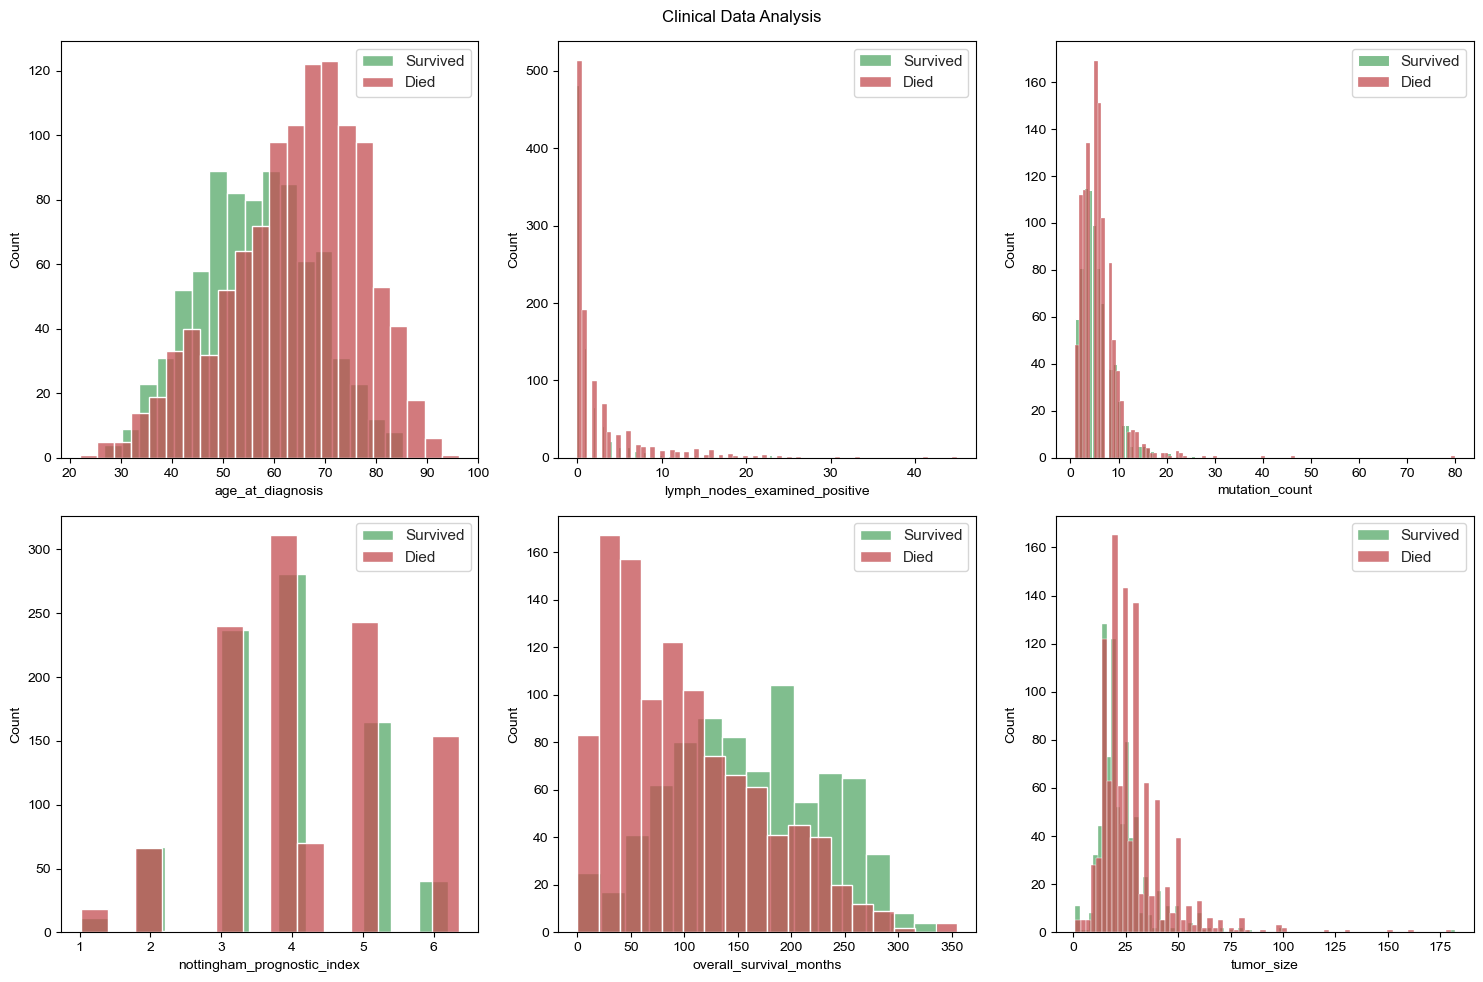

In [6]:
columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]   
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clinical Data Analysis')
    
sns.set(style="whitegrid")
    
for i,ax in zip(data[columns].columns,axs.flatten()):
    sns.histplot(data[i][data['overall_survival']==1], color='g', label = 'Survived',ax=ax)
    sns.histplot(data[i][data['overall_survival']==0], color='r', label = 'Died',ax=ax)
    ax.legend(loc='best')
plt.tight_layout()
plt.show()

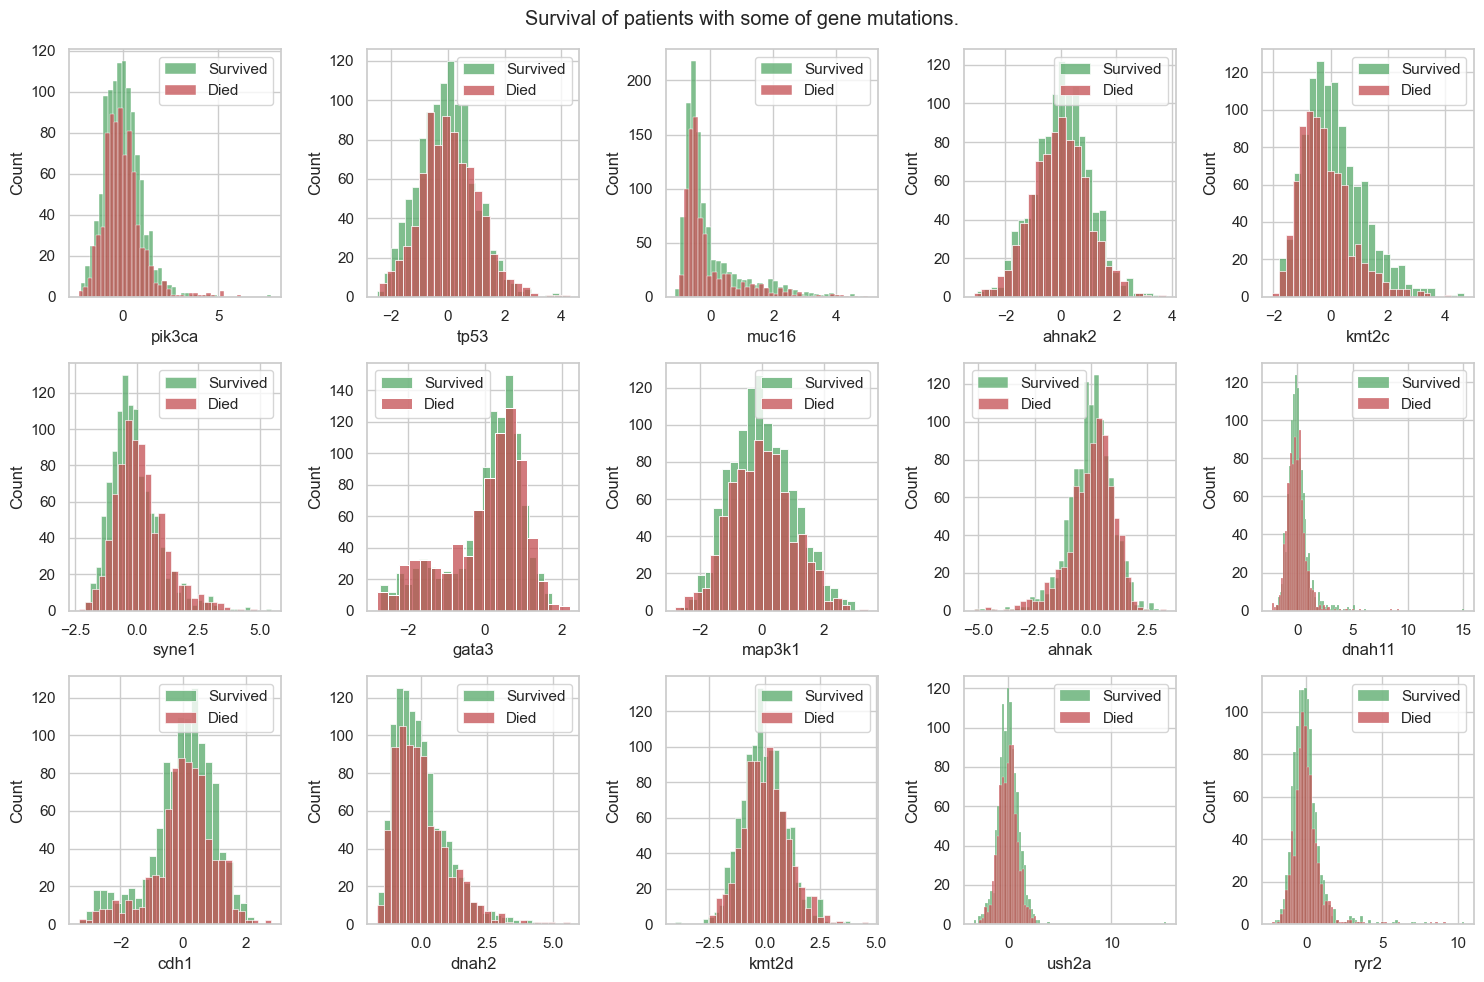

In [7]:
columns = ['pik3ca','tp53','muc16','ahnak2','kmt2c','syne1','gata3','map3k1','ahnak','dnah11','cdh1','dnah2','kmt2d','ush2a','ryr2']   
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Survival of patients with some of gene mutations.')

for i,ax in zip(data.loc[:,columns].columns,axs.flatten()):
    sns.histplot(data[i][data['overall_survival']==0], color='g', label = 'Survived',ax=ax)
    sns.histplot(data[i][data['overall_survival']==1], color='r', label = 'Died',ax=ax)
    ax.legend(loc='best')
plt.tight_layout()
plt.show()

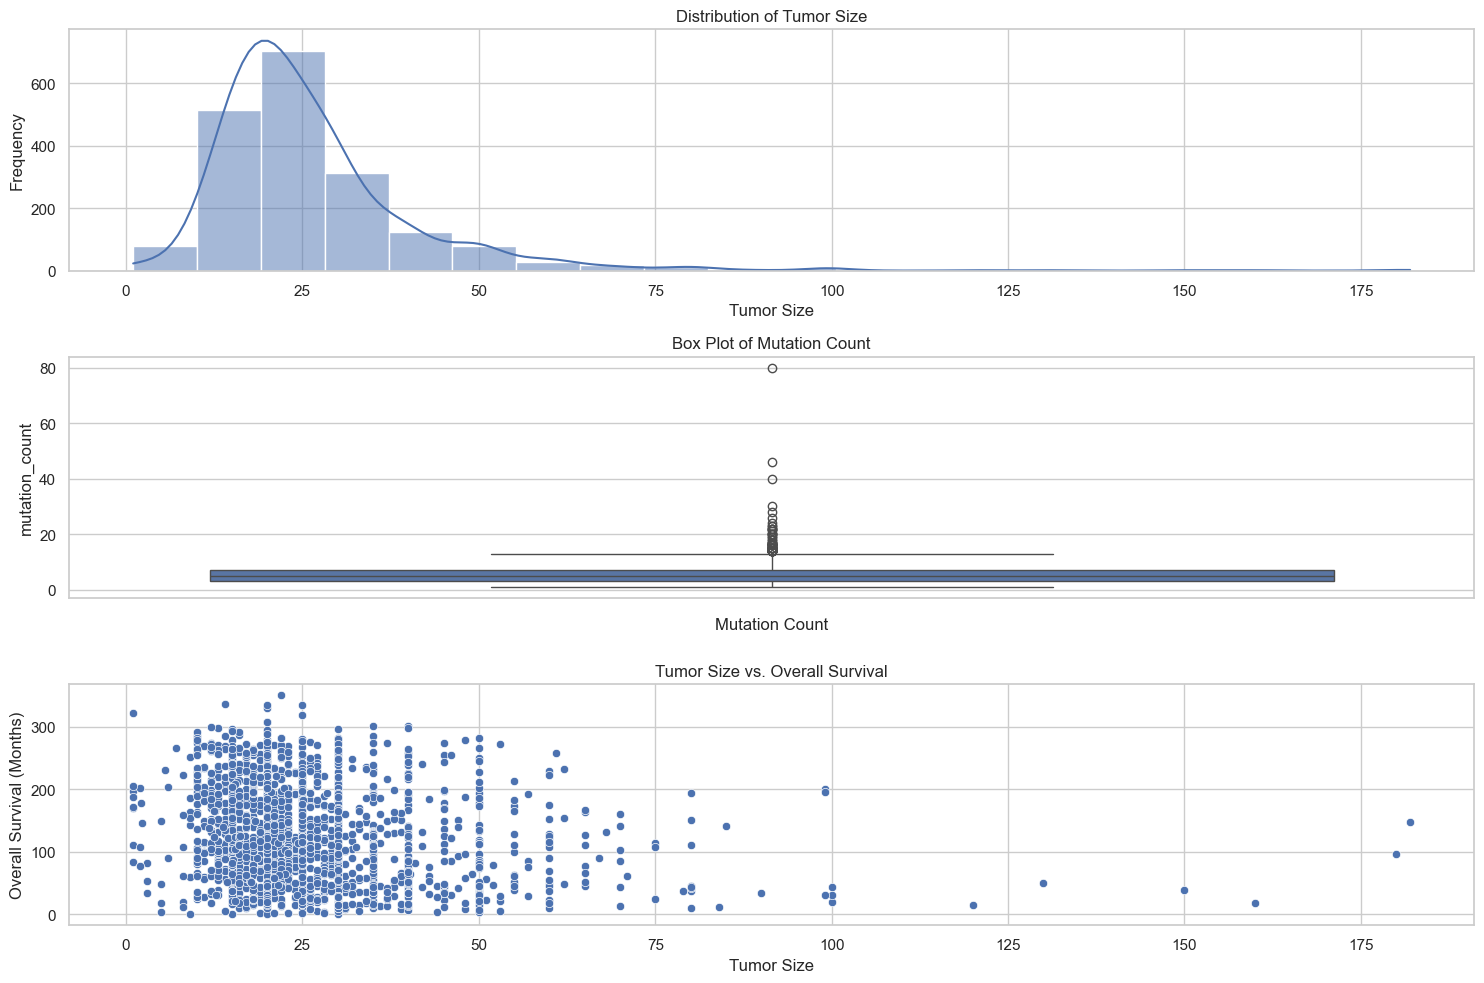

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.histplot(data['tumor_size'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tumor Size')
axes[0].set_xlabel('Tumor Size')
axes[ 0].set_ylabel('Frequency')

sns.boxplot(data['mutation_count'], ax=axes[1])
axes[1].set_title('Box Plot of Mutation Count')
axes[1].set_xlabel('Mutation Count')

sns.scatterplot(data=data, x='tumor_size', y='overall_survival_months', ax=axes[2])
axes[2].set_title('Tumor Size vs. Overall Survival')
axes[2].set_xlabel('Tumor Size')
axes[2].set_ylabel('Overall Survival (Months)')

plt.tight_layout()
plt.show()

In [9]:
data_survival = data[data['death_from_cancer'].notnull()].copy()
clinical_data = data_survival[data_survival.columns[:30]].copy()
clinical_data

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,Positive,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,Positive,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


In [10]:
import missingno as msno

In [11]:
!pip install missingno

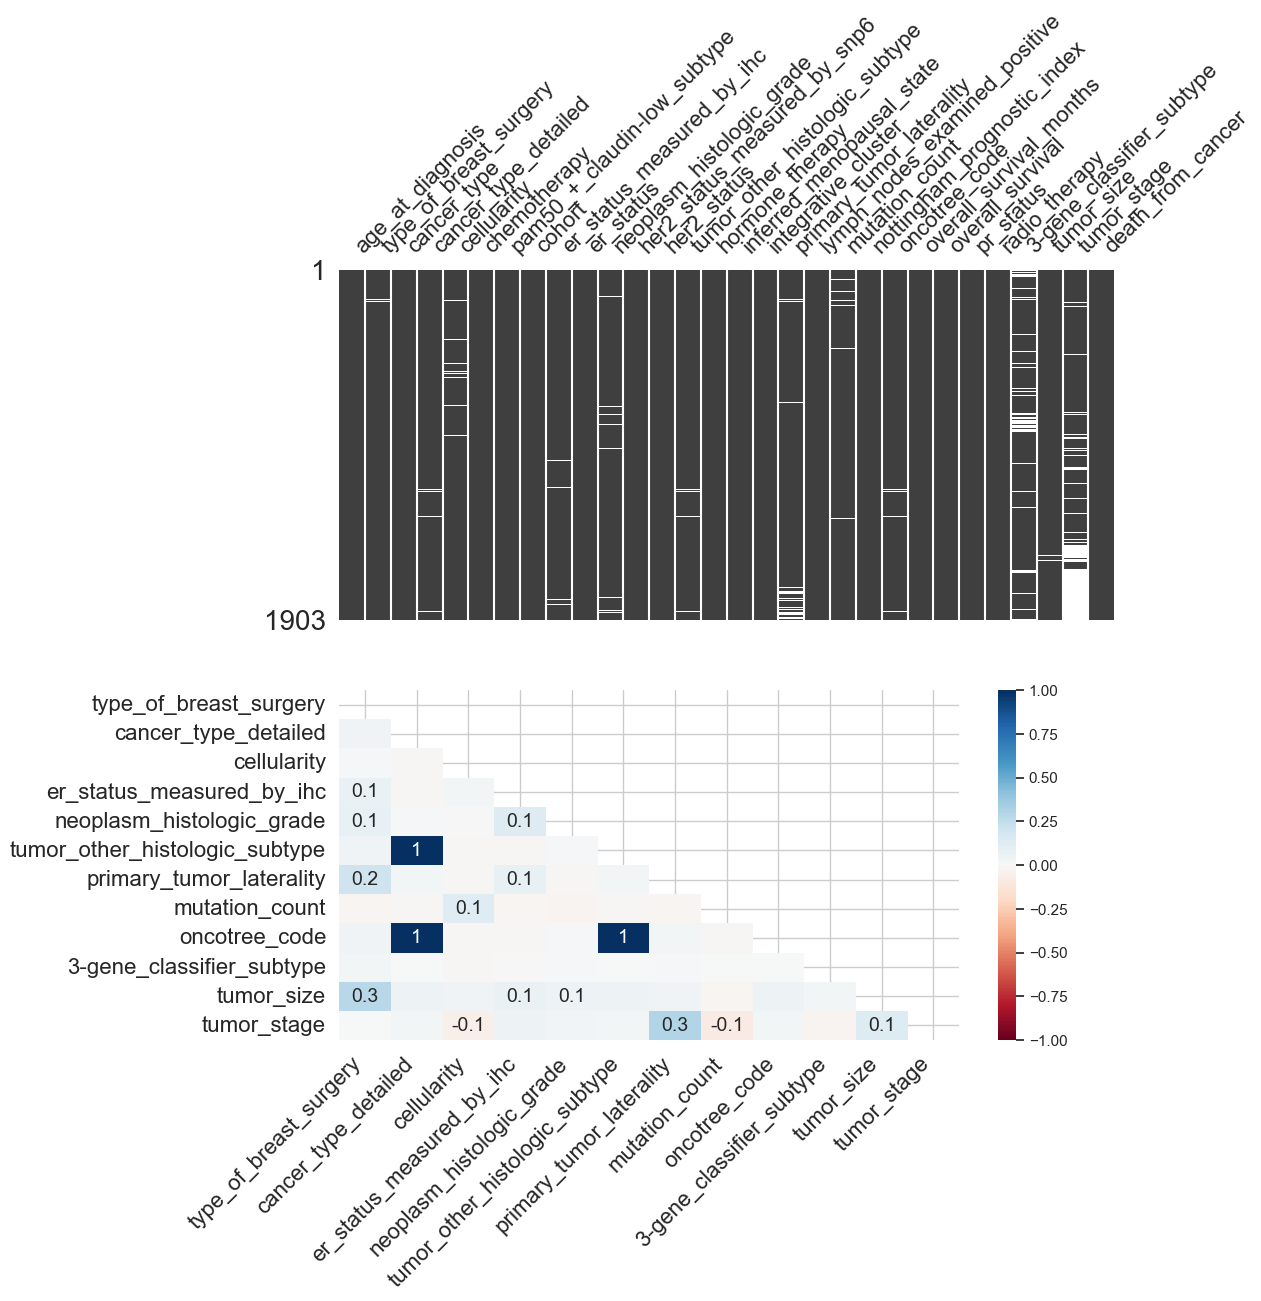

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
ax1 = msno.matrix(clinical_data, ax=axes[0],sparkline=False)
ax2 = msno.heatmap(clinical_data, ax=axes[1])
plt.show()

In [13]:
encoder = LabelEncoder()
clinical_data['death_from_cancer']=encoder.fit_transform(clinical_data['death_from_cancer'])
clinical_data_encoded = pd.get_dummies(clinical_data)
clinical_data_encoded.columns = [re.sub(r'[!@#$%^&*(){}\[\];:,./<>?\\|`~\=_\']', '_', col) for col in clinical_data_encoded.columns]
clinical_data_encoded.describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,death_from_cancer
count,1903.000000,1903.000000,1903.000000,1831.000000,1903.000000,1903.000000,1858.000000,1903.000000,1903.000000,1903.000000,1903.000000,1883.000000,1402.000000,1903.000000
mean,61.088355,0.208092,2.643720,2.415620,0.616921,2.003153,5.693757,4.033020,125.053074,0.420914,0.596952,26.244695,1.751070,1.094062
std,12.981999,0.406050,1.228911,0.650646,0.486265,4.080807,4.056331,1.144792,76.296083,0.493836,0.490639,15.162789,0.628904,0.859830
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,51.370000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.783333,0.000000,0.000000,17.000000,1.000000,0.000000
50%,61.780000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.600000,0.000000,1.000000,23.000000,2.000000,1.000000
75%,70.595000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040500,184.550000,1.000000,1.000000,30.000000,2.000000,2.000000
max,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000,2.000000


In [14]:
clinical_data_encoded = clinical_data_encoded.reset_index(drop=True)

mice_kernel = ImputationKernel(
    data=clinical_data_encoded,
    random_state=42
)


In [15]:
mice_kernel = ImputationKernel(
    data=clinical_data_encoded,
    random_state=42
)

mice_kernel.mice(2)

data_full = mice_kernel.complete_data()


In [16]:
columns_to_keep = data_full.columns != 'death_from_cancer'
X = data_full.loc[:, columns_to_keep]  
y = data_full['death_from_cancer']     

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
def train_models(models, scoring, X, y, cv):
    names = []
    results = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []
    fit_time_scores = []
    HEADER = '\033[95m'
    WARNING = '\033[93m'
    ENDC = '\033[0m'
    print(HEADER + "Running..."+ENDC)
    for name, model in models:
        result = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
        names.append(name)
        results.append(result)
        accuracy_scores.append(result['test_accuracy'].mean())
        precision_scores.append(result['test_precision'].mean())
        recall_scores.append(result['test_recall'].mean())
        f1_scores.append(result['test_f1'].mean())
        roc_auc_scores.append(result['test_roc_auc'].mean())
        fit_time_scores.append(result['fit_time'].sum())
        print(WARNING + f"Progress: {name} finished in {result['fit_time'].sum():.2f} seconds!" + ENDC)
        print(HEADER + "Results:"+ENDC)
        print(f"Accuracy: {accuracy_scores[-1]:.2f}")
        print(f"Precision: {precision_scores[-1]:.2f}")
        print(f"Recall: {recall_scores[-1]:.2f}")
        print(f"F1 Score: {f1_scores[-1]:.2f}")
        print(f"ROC-AUC Score: {roc_auc_scores[-1]:.2f}")
        print(HEADER + "---------------------------------------"+ENDC)
    print(HEADER + "Done!"+ENDC)
    # Plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC','Fit Time']
    scores = [accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores,fit_time_scores]
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Model Performance Metrics')
    
    sns.set(style="whitegrid")
    palette = sns.color_palette("pastel", n_colors=len(names))
    
    for i, ax in enumerate(axs.flat):
        sns.barplot(x=names, y=scores[i], hue=names, ax=ax, palette=palette, dodge=False)
        ax.set_title(metrics[i])
        ax.set_ylabel('Score' if i != 5 else 'Seconds')
        ax.set_xlabel('Model')
        ax.set_ylim(0, 1) if i != 5 else None
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    
    return names, results

Running...
Progress: LogisticRegression finished in 0.29 seconds!
Results:
Accuracy: 0.78
Precision: 0.79
Recall: 0.76
F1 Score: 0.75
ROC-AUC Score: 0.92
---------------------------------------
Progress: RandomForest finished in 1.02 seconds!
Results:
Accuracy: 0.83
Precision: 0.81
Recall: 0.79
F1 Score: 0.79
ROC-AUC Score: 0.94
---------------------------------------
Progress: KNeighbors finished in 0.02 seconds!
Results:
Accuracy: 0.56
Precision: 0.55
Recall: 0.54
F1 Score: 0.54
ROC-AUC Score: 0.72
---------------------------------------
Progress: DecisionTree finished in 0.05 seconds!
Results:
Accuracy: 0.80
Precision: 0.76
Recall: 0.76
F1 Score: 0.76
ROC-AUC Score: 0.85
---------------------------------------
Progress: NaiveBayes finished in 0.03 seconds!
Results:
Accuracy: 0.79
Precision: 0.76
Recall: 0.75
F1 Score: 0.75
ROC-AUC Score: 0.92
---------------------------------------
Done!


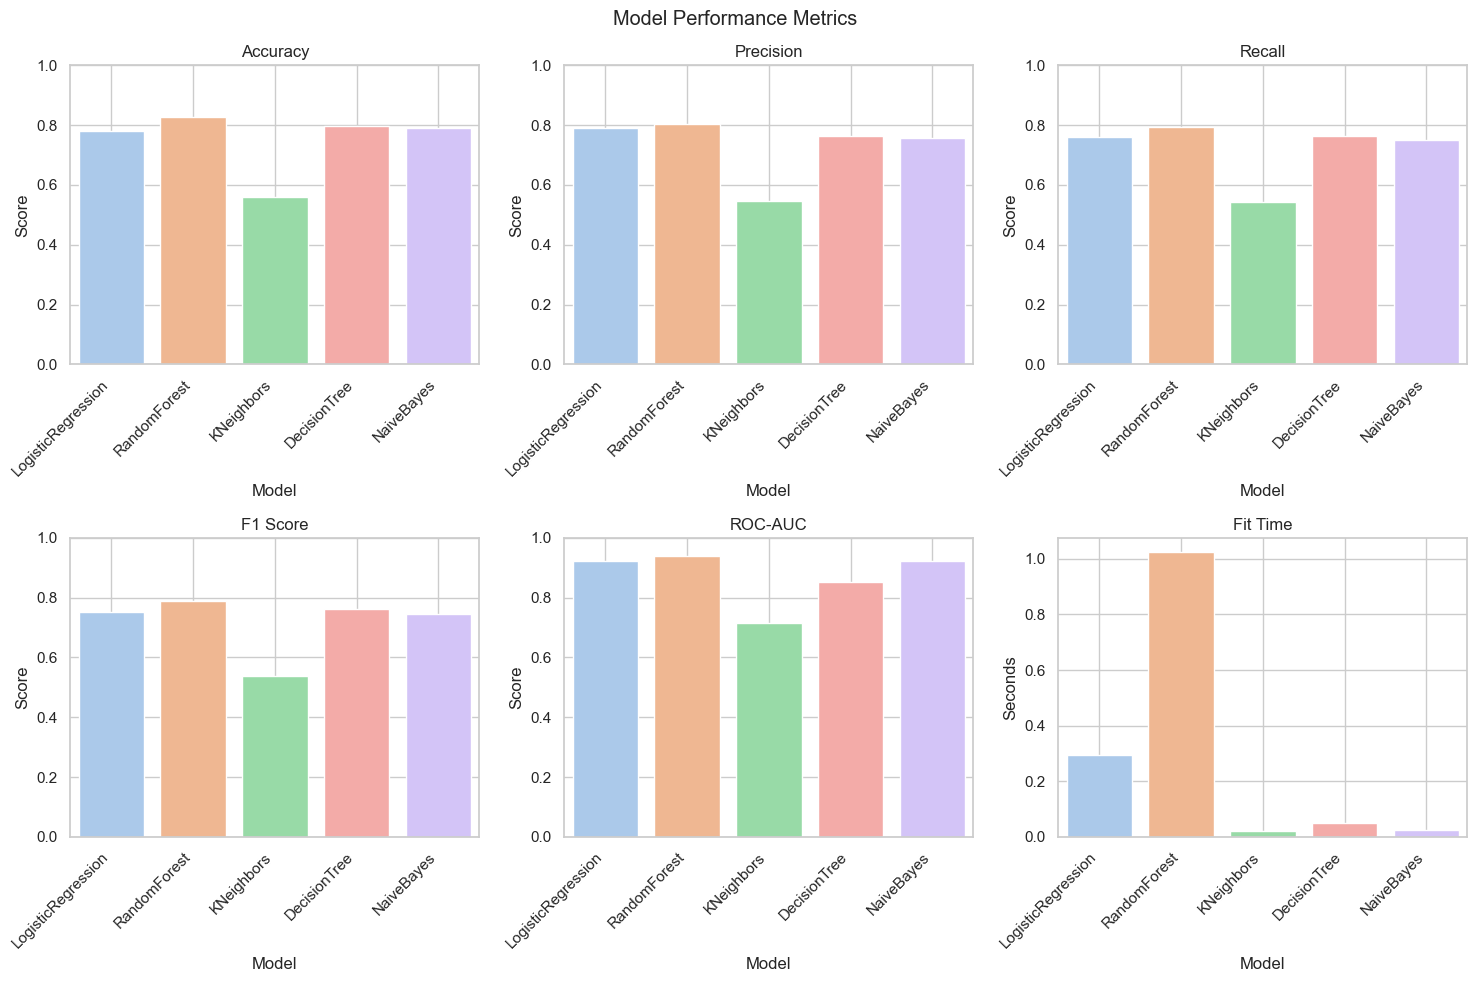

In [18]:
models = [("LogisticRegression",LogisticRegression()),
         ("RandomForest",RandomForestClassifier(random_state=42,max_depth=10)),
         ("KNeighbors",KNeighborsClassifier()),
         ("DecisionTree",DecisionTreeClassifier(random_state=42,max_depth=10)),
         ("NaiveBayes",GaussianNB())]
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'roc_auc': 'roc_auc_ovr'}
names , results = train_models(models=models,scoring=scoring,X=X,y=y,cv=5)

In [19]:
genetic_data = data_survival[data_survival.columns[30:519]].copy()
genetic_data.isnull().sum().sum()

0

In [20]:
genetic_data.describe(include='all')

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.00000,1903.000000,1903.000000
mean,0.000410,0.001073,-0.001062,-0.000312,-0.000356,0.001180,0.000214,-0.000290,-0.000263,0.000074,...,0.000170,0.000363,0.000606,-0.000203,-0.000633,-0.000451,-0.000325,0.00013,0.000169,-0.000377
std,1.000364,0.999428,0.999451,1.000433,1.000404,0.999198,1.000483,1.000445,1.000460,1.000519,...,1.000499,1.000399,1.000174,1.000486,1.000146,1.000332,1.000424,1.00051,1.000498,1.000390
min,-2.444400,-2.783500,-4.384600,-5.932800,-2.481200,-3.170500,-3.323700,-2.688700,-3.689800,-2.968600,...,-2.120800,-3.364800,-2.719400,-4.982700,-2.981700,-3.833300,-3.609300,-1.16690,-2.112600,-1.051600
25%,-0.718300,-0.698550,-0.680250,-0.558900,-0.666200,-0.658250,-0.459000,-0.738900,-0.667050,-0.684050,...,-0.618900,-0.609900,-0.673350,-0.614050,-0.633200,-0.666550,-0.710300,-0.50585,-0.476500,-0.726000
50%,-0.124000,-0.057800,-0.023900,0.108700,-0.035200,-0.003200,0.115800,-0.131600,-0.014900,-0.053700,...,-0.245400,-0.046400,-0.141800,-0.052000,-0.028000,0.000200,-0.030100,-0.28860,-0.133400,-0.426200
75%,0.553250,0.629000,0.638400,0.642750,0.643050,0.690400,0.650100,0.539600,0.639450,0.669450,...,0.330700,0.515400,0.514800,0.578950,0.590150,0.641850,0.595050,0.06025,0.270950,0.422000
max,4.554200,3.737900,4.615000,3.254100,4.289800,3.824200,2.820900,4.538200,5.371300,6.178600,...,6.534900,10.270300,6.329000,4.571300,12.742300,3.938800,3.833400,10.88490,12.643900,3.284400


Running...
Progress: LogisticRegression finished in 1.03 seconds!
Results:
Accuracy: 0.38
Precision: 0.37
Recall: 0.37
F1 Score: 0.36
ROC-AUC Score: 0.54
---------------------------------------
Progress: RandomForest finished in 11.74 seconds!
Results:
Accuracy: 0.42
Precision: 0.41
Recall: 0.38
F1 Score: 0.35
ROC-AUC Score: 0.59
---------------------------------------
Progress: KNeighbors finished in 0.08 seconds!
Results:
Accuracy: 0.39
Precision: 0.37
Recall: 0.36
F1 Score: 0.35
ROC-AUC Score: 0.55
---------------------------------------
Progress: DecisionTree finished in 3.95 seconds!
Results:
Accuracy: 0.38
Precision: 0.37
Recall: 0.36
F1 Score: 0.36
ROC-AUC Score: 0.51
---------------------------------------
Progress: NaiveBayes finished in 0.19 seconds!
Results:
Accuracy: 0.41
Precision: 0.43
Recall: 0.42
F1 Score: 0.39
ROC-AUC Score: 0.60
---------------------------------------
Done!


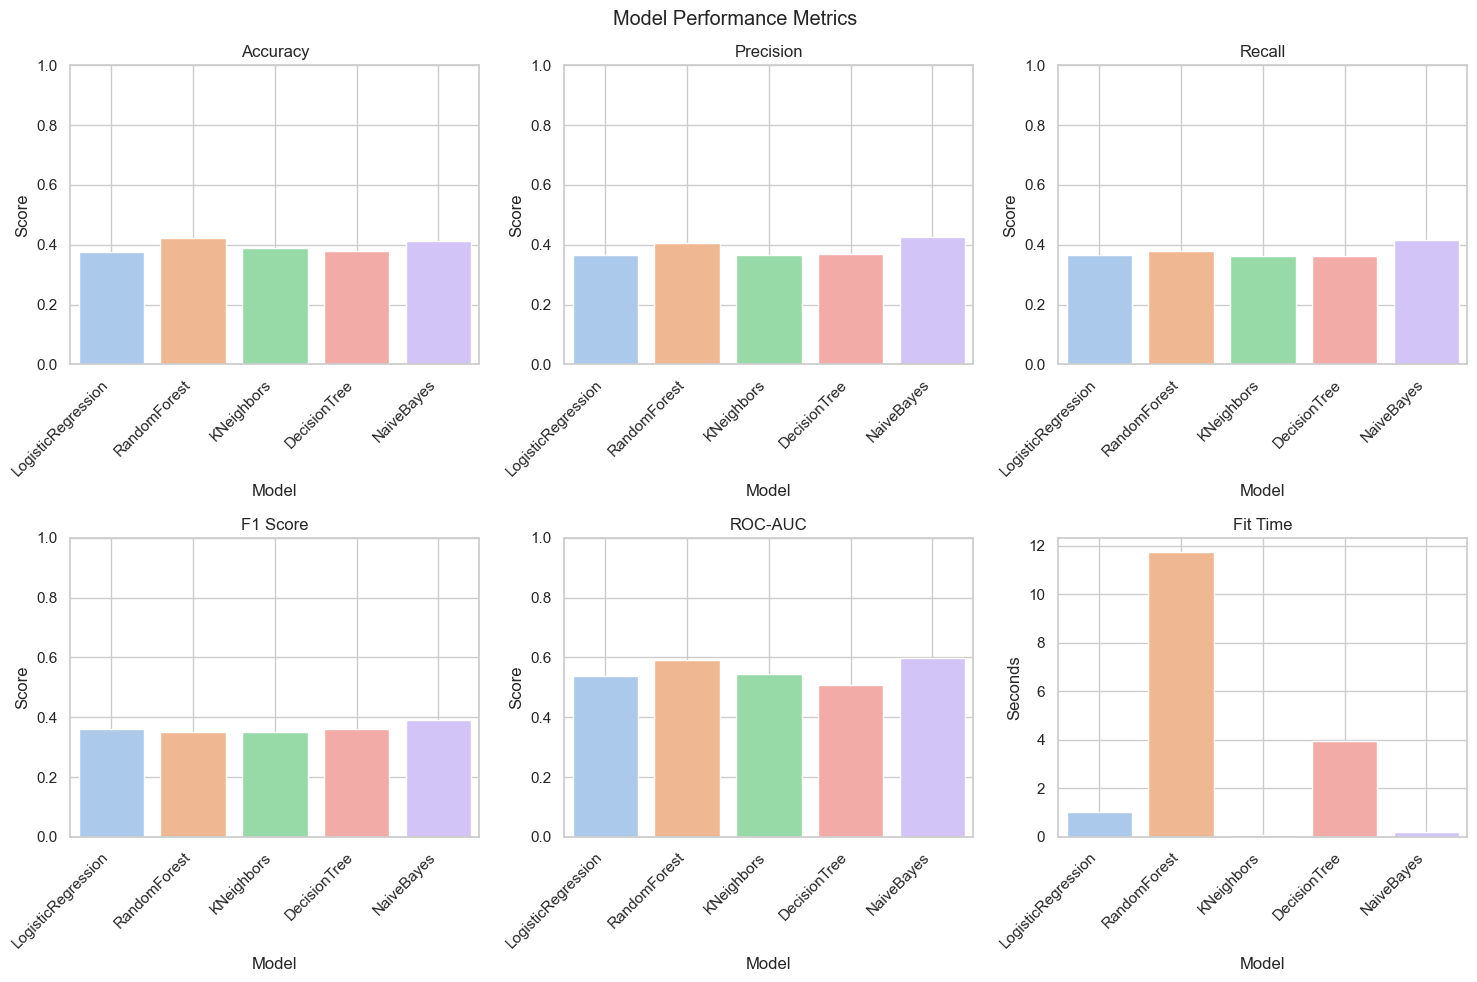

In [21]:
models = [("LogisticRegression",LogisticRegression()),
         ("RandomForest",RandomForestClassifier(random_state=42,max_depth=10)),
         ("KNeighbors",KNeighborsClassifier()),
         ("DecisionTree",DecisionTreeClassifier(random_state=42,max_depth=10)),
         ("NaiveBayes",GaussianNB())]
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'roc_auc': 'roc_auc_ovr'}
names , results = train_models(models=models,scoring=scoring,X=genetic_data,y=y,cv=5)

In [22]:
merged_data = pd.concat([data_full, genetic_data], axis=1)
merged_data.describe(include='all')

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.00000,1903.000000,1903.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,61.088355,0.208092,2.643720,2.366789,0.616921,2.003153,5.631109,4.033020,125.053074,0.420914,...,0.000170,0.000363,0.000606,-0.000203,-0.000633,-0.000451,-0.000325,0.00013,0.000169,-0.000377
std,12.981999,0.406050,1.228911,0.687113,0.486265,4.080807,4.037094,1.144792,76.296083,0.493836,...,1.000499,1.000399,1.000174,1.000486,1.000146,1.000332,1.000424,1.00051,1.000498,1.000390
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-2.120800,-3.364800,-2.719400,-4.982700,-2.981700,-3.833300,-3.609300,-1.16690,-2.112600,-1.051600
25%,51.370000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.783333,0.000000,...,-0.618900,-0.609900,-0.673350,-0.614050,-0.633200,-0.666550,-0.710300,-0.50585,-0.476500,-0.726000
50%,61.780000,0.000000,3.000000,2.000000,1.000000,0.000000,5.000000,4.042000,115.600000,0.000000,...,-0.245400,-0.046400,-0.141800,-0.052000,-0.028000,0.000200,-0.030100,-0.28860,-0.133400,-0.426200
75%,70.595000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040500,184.550000,1.000000,...,0.330700,0.515400,0.514800,0.578950,0.590150,0.641850,0.595050,0.06025,0.270950,0.422000


In [23]:
columns_to_keep = merged_data.columns != 'death_from_cancer'
X = merged_data.loc[:,columns_to_keep]
y = merged_data['death_from_cancer']

In [24]:
print(y.isnull().sum())

1


In [25]:
X = X[~y.isna()]
y = y[~y.isna()]

In [26]:
y.fillna(y.mode()[0], inplace=True)

Running...
Progress: LogisticRegression finished in 0.58 seconds!
Results:
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan
ROC-AUC Score: nan
---------------------------------------
Progress: RandomForest finished in 13.68 seconds!
Results:
Accuracy: 0.70
Precision: 0.67
Recall: 0.65
F1 Score: 0.63
ROC-AUC Score: 0.88
---------------------------------------
Progress: KNeighbors finished in 0.65 seconds!
Results:
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan
ROC-AUC Score: nan
---------------------------------------
Progress: DecisionTree finished in 3.15 seconds!
Results:
Accuracy: 0.76
Precision: 0.73
Recall: 0.72
F1 Score: 0.72
ROC-AUC Score: 0.81
---------------------------------------
Progress: NaiveBayes finished in 0.49 seconds!
Results:
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan
ROC-AUC Score: nan
---------------------------------------
Done!


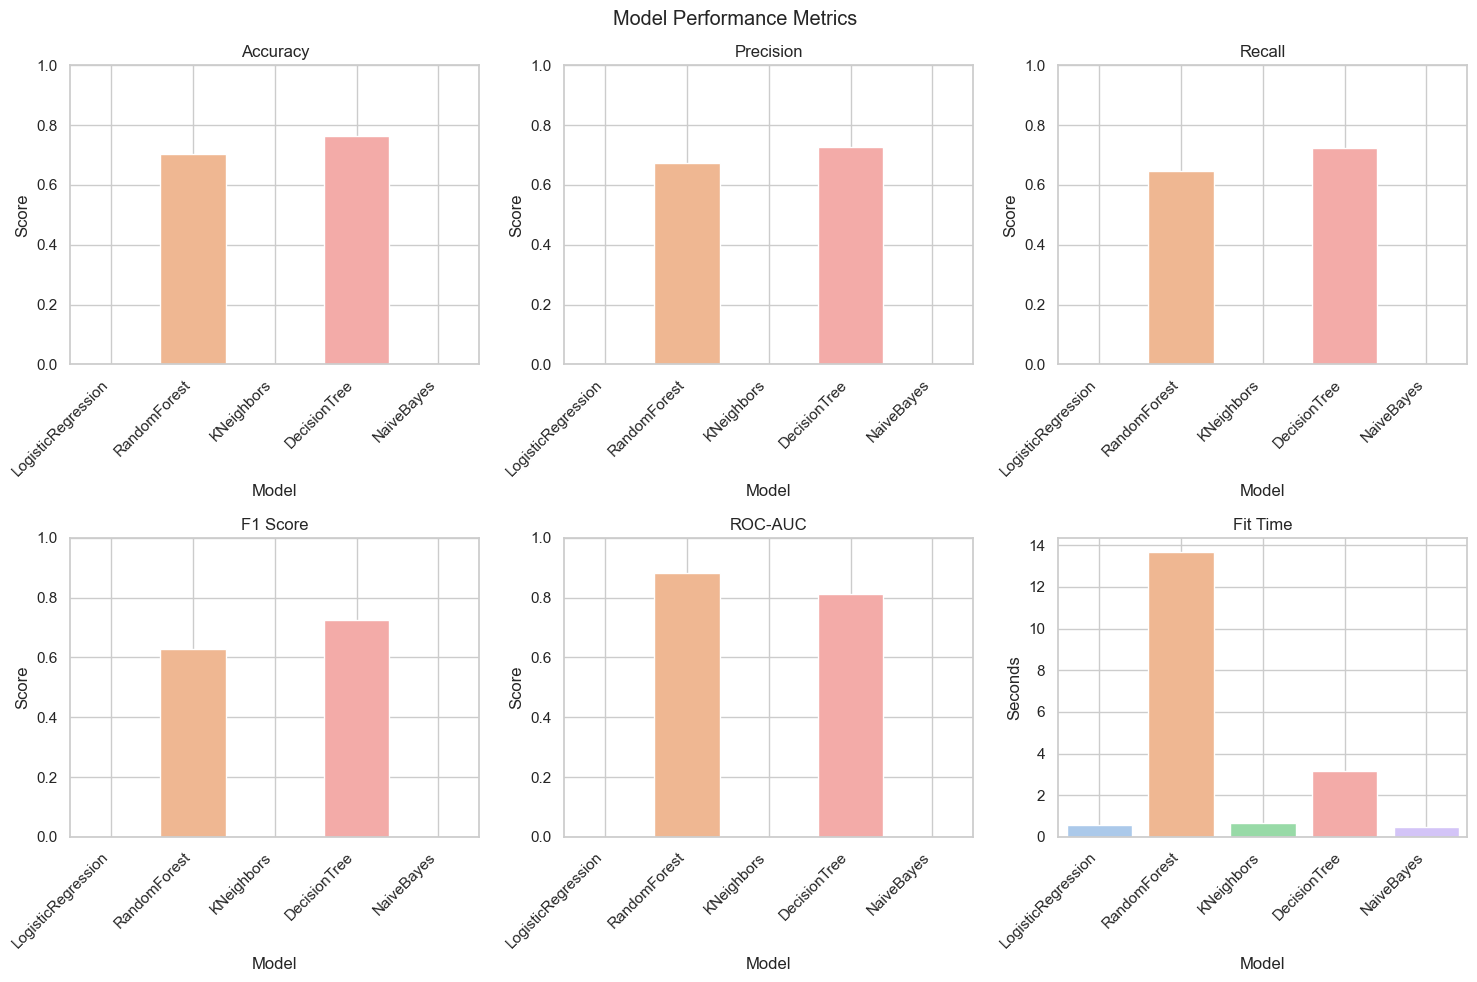

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names, results = train_models(models=models, scoring=scoring, X=X, y=y, cv=5)

Running...
Progress: LogisticRegression finished in 0.66 seconds!
Results:
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan
ROC-AUC Score: nan
---------------------------------------
Progress: RandomForest finished in 13.17 seconds!
Results:
Accuracy: 0.70
Precision: 0.67
Recall: 0.65
F1 Score: 0.63
ROC-AUC Score: 0.88
---------------------------------------
Progress: KNeighbors finished in 0.53 seconds!
Results:
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan
ROC-AUC Score: nan
---------------------------------------
Progress: DecisionTree finished in 2.86 seconds!
Results:
Accuracy: 0.76
Precision: 0.73
Recall: 0.72
F1 Score: 0.72
ROC-AUC Score: 0.81
---------------------------------------
Progress: NaiveBayes finished in 0.61 seconds!
Results:
Accuracy: nan
Precision: nan
Recall: nan
F1 Score: nan
ROC-AUC Score: nan
---------------------------------------
Done!


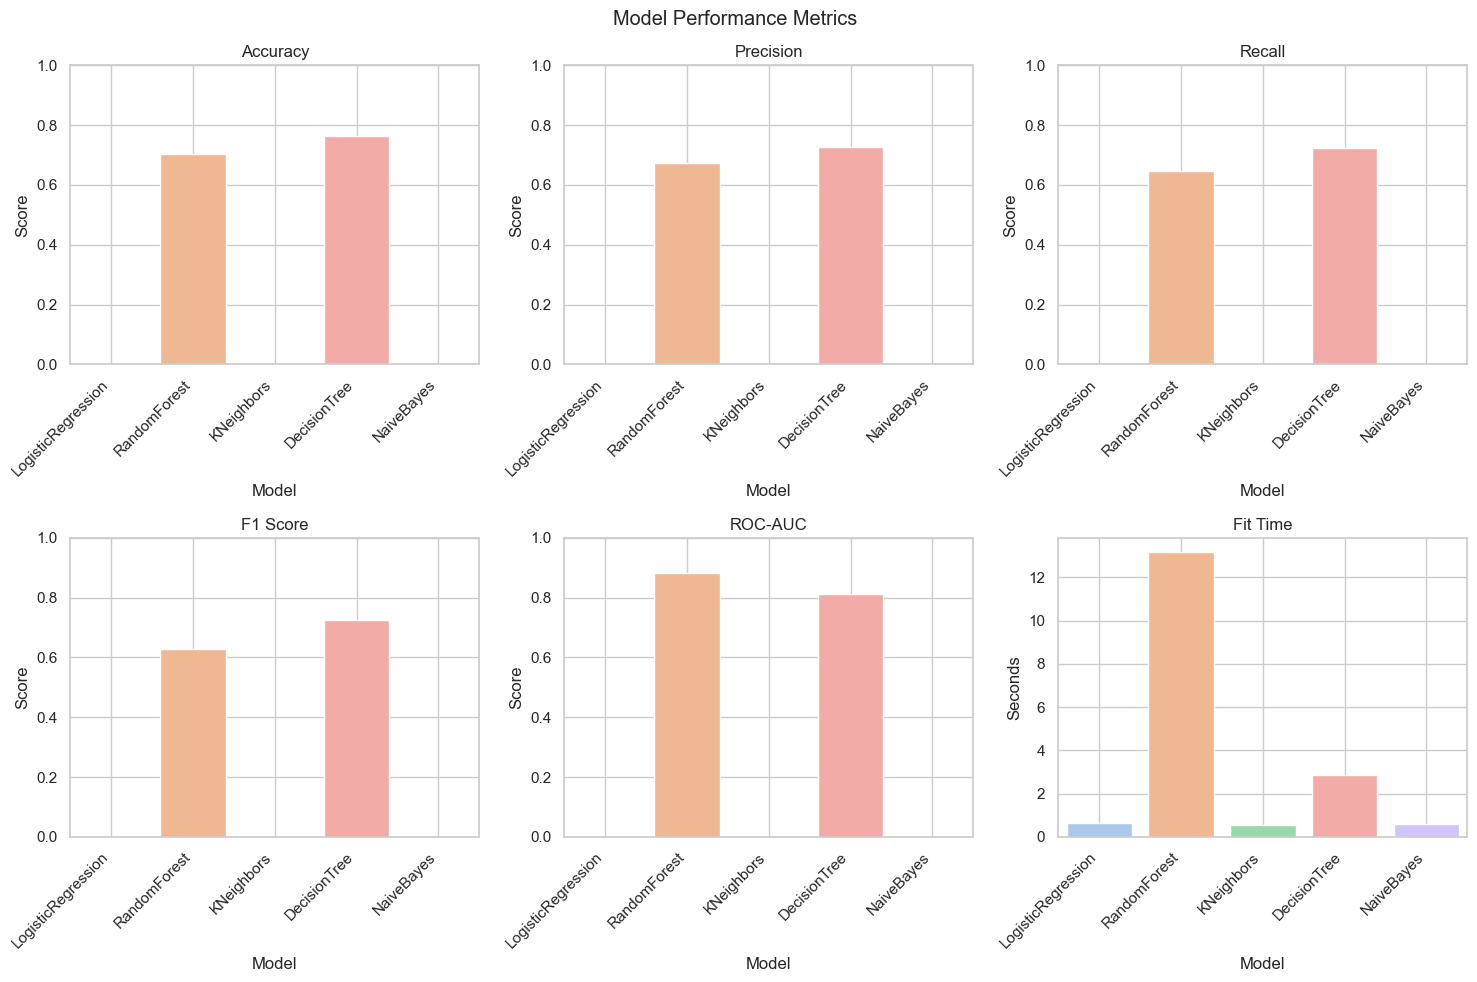

In [28]:
models = [("LogisticRegression",LogisticRegression()),
         ("RandomForest",RandomForestClassifier(random_state=42,max_depth=10)),
         ("KNeighbors",KNeighborsClassifier()),
         ("DecisionTree",DecisionTreeClassifier(random_state=42,max_depth=10)),
         ("NaiveBayes",GaussianNB())]
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'roc_auc': 'roc_auc_ovr'}
names , results = train_models(models=models,scoring=scoring,X=X,y=y,cv=5)

In [29]:
import xgboost as xgb 

In [30]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
param_grid = {
    'eta': [0.1, 0.25, 0.5, 0.75, 1],
    'max_depth': [3, 6, 9],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

model_xgb = xgb.XGBClassifier(objective='multi:softprob', num_class=3)

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

preds = best_model.predict(X_test)

precision = precision_score(y_test, preds, average='macro')
recall = recall_score(y_test, preds, average='macro')
accuracy = accuracy_score(y_test, preds)

print("Best Parameters:", best_params)
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("Accuracy = {}".format(accuracy))

In [ ]:
X_train = X_train.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)
y_test = y_test.values.astype(np.float32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from math import exp

def exponential_decay(epoch, lr):
    k = 0.003 
    interval = 20 
    if epoch % interval == 0 and epoch > 0:
        new_lr = lr * exp(-k * epoch)
        return new_lr
    else:
        return lr


lr = LearningRateScheduler(exponential_decay)
early_stopping = EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(78,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=200,batch_size=10,callbacks=[early_stopping,lr])

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()

plt.tight_layout()
plt.show()
